## Simple Dielectric

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.constants import c,pi,mu_0,epsilon_0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
freq = 3e9
w = 2*pi*freq

L_T = 2
N_l = 100

wavelength = c/freq
dz1 = wavelength/N_l
N_T = round(L_T/dz1)+1
dz = L_T/N_T

print("Wavelength = ", wavelength)
print("N_T = ", N_T)
print("d_z = ", dz)

Wavelength =  0.09993081933333334
N_T =  2002
d_z =  0.000999000999000999


In [4]:
#Gaussian pulse parameters
bw = 1.5e9; #Aprox
tau = 1/bw;
t0 = 2*tau;

In [7]:
S = 0.5
dt = S*dz/c
dt = min([S*dz/c, tau/20])
print(dt)

print(t0/dt)

1.666154321669091e-12
800.2460012213334


In [9]:
#Simple material model
erz = np.ones(N_T+1)
x1 = 750
x2 = 1500
erz[x1:x2] = 3

<IPython.core.display.Javascript object>


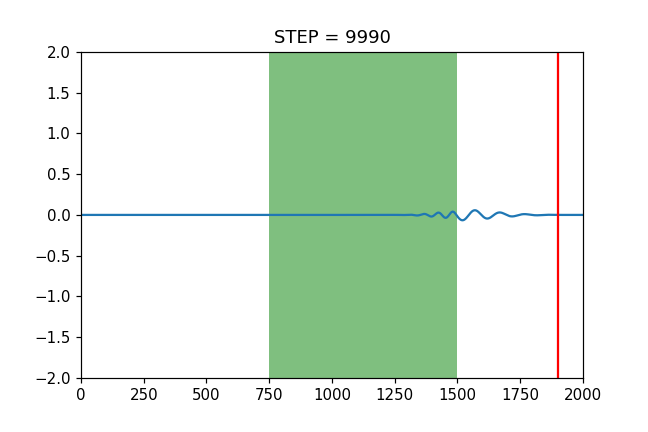

In [10]:
#Number of time steps
STEPS = 10000

#Initialize fields
ey = np.zeros(N_T+1)
hx = np.zeros(N_T)

#Initialize boundary conditions
ey_0_2 = 0
ey_0_1 = 0
ey_N_2 = 0
ey_N_1 = 0
    
#Location of source    
k_source = 50

#location of probe
k_probe = N_T-100
ey_probe = np.zeros(STEPS)

#Initialize dynamic figure
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()

#Update factors
alpha_h = dt/(dz*mu_0)
alpha_e = dt/(dz*epsilon_0)

for n in range(0,STEPS):

    hx = hx +  alpha_h*(ey[1:]-ey[:N_T])
    ey[1:N_T] = ey[1:N_T] + alpha_e*(hx[1:] - hx[:N_T-1])/erz[1:N_T]

    #Apply source
    ey[k_source] = ey[k_source] + np.sin(w*n*dt)*np.exp(-((n*dt-t0)/tau)**2)
    
    #Apply old boundary condition
    ey[0] = ey_0_2
    ey[N_T] = ey_N_2
    
    #Save boundary condition
    ey_0_2 = ey_0_1
    ey_0_1 = ey[1]
    ey_N_2 = ey_N_1
    ey_N_1 = ey[N_T-1]
    
    #Save field at probe location
    ey_probe[n] = ey[k_probe]
    
    if n%10==0:
        ax.clear()
        ax.plot(ey)
        ax.axes.set_ylim(-2,2)
        ax.axvspan(x1, x2, facecolor='g', alpha=0.5)
        ax.axvline(k_probe, color='r')
        ax.margins(0)
        ax.set_title('STEP = %i' % n)
        fig.canvas.draw()
        time.sleep(0.001)
    
#plt.plot(ey_probe)

<IPython.core.display.Javascript object>


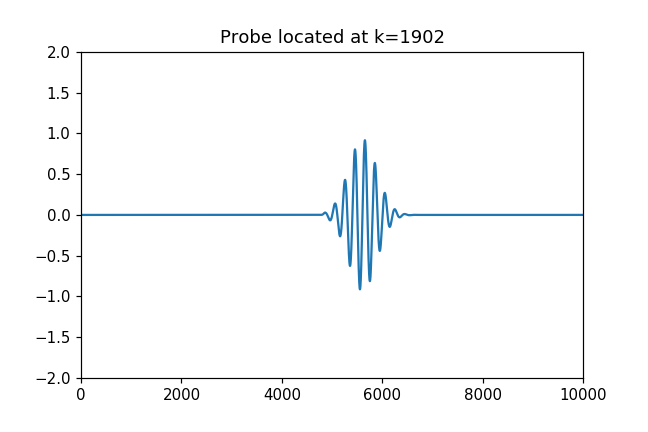

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.canvas.draw()
ax.plot(ey_probe)
ax.axes.set_ylim(-2,2)
ax.margins(0)
ax.set_title('Probe located at k=%i' % k_probe)
fig.canvas.draw()